In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\shreeyansh\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3


In [3]:
import os 
file_one,file_two=os.listdir(path)

In [4]:
file_one_path=path+'/'+file_one
file_two_path=path+'/'+file_two
print(file_one_path)
print(file_two_path)

C:\Users\shreeyansh\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/deliveries.csv
C:\Users\shreeyansh\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/matches.csv


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

print("done")

done


In [6]:
df_deliveries=pd.read_csv(file_one_path)
df_matches=pd.read_csv(file_two_path)
print("done")

done


In [7]:
df_matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [8]:
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [9]:
df_matches.shape

(1095, 20)

In [10]:
df_deliveries.shape

(260920, 17)

In [11]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [12]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [13]:
#null values count
df_matches.isna().sum().sort_values(ascending=False)

method             1074
city                 51
result_margin        19
player_of_match       5
winner                5
target_runs           3
target_overs          3
id                    0
date                  0
season                0
venue                 0
match_type            0
toss_decision         0
toss_winner           0
team2                 0
team1                 0
result                0
super_over            0
umpire1               0
umpire2               0
dtype: int64

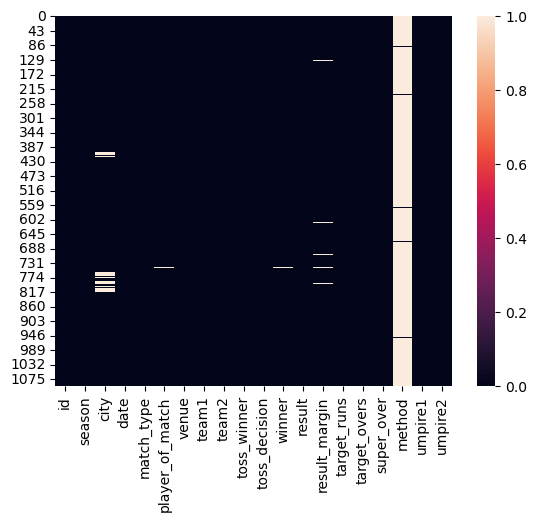

In [14]:
#heatmap
sns.heatmap(df_matches.isna())
plt.show()

In [15]:
#null values count
df_matches.isna().mean().sort_values(ascending=False)*100

method             98.082192
city                4.657534
result_margin       1.735160
player_of_match     0.456621
winner              0.456621
target_runs         0.273973
target_overs        0.273973
id                  0.000000
date                0.000000
season              0.000000
venue               0.000000
match_type          0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
result              0.000000
super_over          0.000000
umpire1             0.000000
umpire2             0.000000
dtype: float64

In [16]:
df_matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [17]:
df_matches['method'].fillna('Normal Method',inplace=True)

C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_9528\2862709222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['method'].fillna('Normal Method',inplace=True)


In [18]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [19]:
df_matches[df_matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,Normal Method,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,Normal Method,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,Normal Method,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,Normal Method,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,Normal Method,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,Normal Method,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,Normal Method,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,Normal Method,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,Normal Method,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,Normal Method,Aleem Dar,VA Kulkarni


In [20]:
df_matches['city'].fillna('UAE',inplace=True)

C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_9528\4008184948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['city'].fillna('UAE',inplace=True)


In [21]:
df_matches.isna().mean().sort_values(ascending=False,inplace=True)

In [22]:
df_matches[df_matches['result_margin'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,Normal Method,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,Normal Method,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,Normal Method,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,Normal Method,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,Normal Method,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,Normal Method,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,Normal Method,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,Normal Method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,Normal Method,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,Normal Method,AK Chaudhary,CB Gaffaney


In [23]:
df_matches['result_margin'].fillna(0,inplace=True)

C:\Users\shreeyansh\AppData\Local\Temp\ipykernel_9528\4158405259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['result_margin'].fillna(0,inplace=True)


In [24]:
df_matches[df_matches['winner'].isna()]


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,0.0,NaN,NaN,N,Normal Method,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,Normal Method,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,Normal Method,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,AK Chaudhary,NA Patwardhan


In [25]:
df_matches.fillna({'player of the match':'no player of the match','winner':'no winner of the match'},inplace=True)

In [26]:
df_matches[df_matches['winner'].isna()]


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2


In [27]:
df_matches.fillna(0,inplace=True)

In [28]:
df_matches.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

<Axes: >

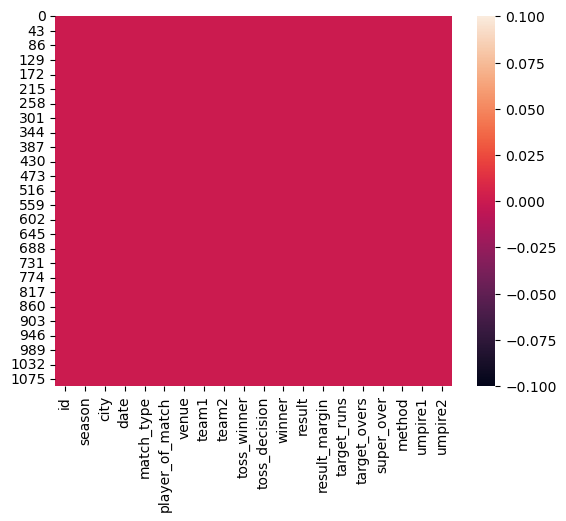

In [29]:
sns.heatmap(df_matches.isna())

In [30]:
df_matches['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
UAE                51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [31]:
data_rp = {'Navi Mumbai':'Mumbai',
           'Bengaluru':'Bangalore',
           'Sharjah':'UAE',
           'Abu Dhabi':'UAE','Kimberley':'Cape Town','Dubai':'UAE'}


df_matches.replace(data_rp,inplace = True)
print('Done')

Done


In [32]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [33]:
#check duplicacy
df_matches.duplicated('id').value_counts()

False    1095
Name: count, dtype: int64

In [34]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1095 non-null   float64
 15  target_overs     1095 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [35]:
df_matches['date']=pd.to_datetime(df_matches['date'])

In [36]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1095 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1095 non-null   float64       
 14  target_runs      1095 non-null   float64

In [37]:
df_matches['venue'].value_counts().index

Index(['Eden Gardens', 'Wankhede Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla', 'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Sawai Mansingh Stadium',
       'Dubai International Cricket Stadium', 'Wankhede Stadium, Mumbai',
       'Punjab Cricket Association Stadium, Mohali', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai',
       'Narendra Modi Stadium, Ahmedabad',
       'Maharashtra Cricket Association Stadium',
       'Dr DY Patil Sports Academy, Mumbai', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium, Mumbai', 'Subrata Roy Sahara Stadium',
       'Eden Gardens, Kolkata', 'Arun Jaitley Stadium, Delhi', 'Kingsmead',
       'M.Chinnaswamy Stadium', 'Rajiv Gandhi International Stadium',
       'Arun Jaitley Stadium',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'M Chinnaswamy Stadium, Bengaluru',
       'Rajiv Gandhi Internat

In [38]:
df_matches['venue'].str.split(',')

0                                 [M Chinnaswamy Stadium]
1           [Punjab Cricket Association Stadium,  Mohali]
2                                      [Feroz Shah Kotla]
3                                      [Wankhede Stadium]
4                                          [Eden Gardens]
                              ...                        
1090    [Rajiv Gandhi International Stadium,  Uppal,  ...
1091                  [Narendra Modi Stadium,  Ahmedabad]
1092                  [Narendra Modi Stadium,  Ahmedabad]
1093         [MA Chidambaram Stadium,  Chepauk,  Chennai]
1094         [MA Chidambaram Stadium,  Chepauk,  Chennai]
Name: venue, Length: 1095, dtype: object

In [39]:
df_matches['venue'].apply(lambda row:row.lower().split(','))

0                                 [m chinnaswamy stadium]
1           [punjab cricket association stadium,  mohali]
2                                      [feroz shah kotla]
3                                      [wankhede stadium]
4                                          [eden gardens]
                              ...                        
1090    [rajiv gandhi international stadium,  uppal,  ...
1091                  [narendra modi stadium,  ahmedabad]
1092                  [narendra modi stadium,  ahmedabad]
1093         [ma chidambaram stadium,  chepauk,  chennai]
1094         [ma chidambaram stadium,  chepauk,  chennai]
Name: venue, Length: 1095, dtype: object

In [40]:
df_matches['venue'].apply(lambda row:row.title().split(',')[0])

0                    M Chinnaswamy Stadium
1       Punjab Cricket Association Stadium
2                         Feroz Shah Kotla
3                         Wankhede Stadium
4                             Eden Gardens
                       ...                
1090    Rajiv Gandhi International Stadium
1091                 Narendra Modi Stadium
1092                 Narendra Modi Stadium
1093                Ma Chidambaram Stadium
1094                Ma Chidambaram Stadium
Name: venue, Length: 1095, dtype: object

In [41]:
df_matches['venue'].value_counts()

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narend

In [42]:
df_matches['venue'].value_counts().reset_index()

,venue,count
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,Sawai Mansingh Stadium,47
7,Dubai International Cricket Stadium,46
8,"Wankhede Stadium, Mumbai",45
9,"Punjab Cricket Association Stadium, Mohali",35


NameError: name 'ax' is not defined

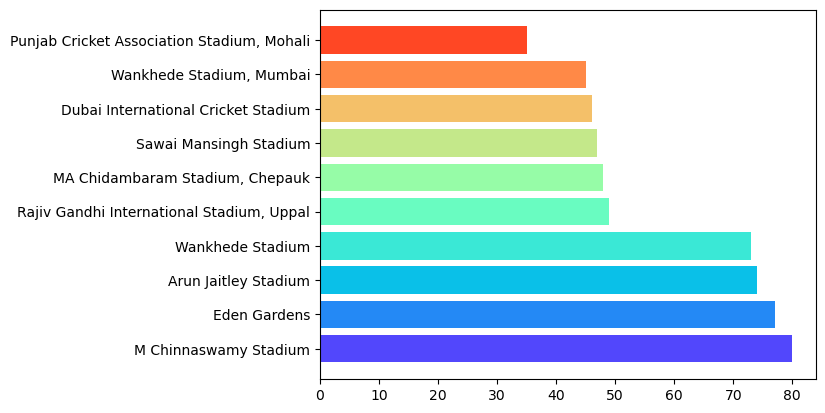

In [43]:
data_v_rp = {'M.Chinnaswamy Stadium':'M Chinnaswamy Stadium',
             'Feroz Shah Kotla':'Arun Jaitley Stadium',
             'Sardar Patel Stadium':'Narendra Modi Stadium',
             'Punjab Cricket Association Is Bindra Stadium':'Punjab Cricket Association Stadium'}
df_matches['venue'].replace(data_v_rp,inplace=True)
venue_name=df_matches['venue'].value_counts().head(10).index
venue_values=df_matches['venue'].value_counts().head(10).values
plt.barh(venue_name,venue_values,color=sns.color_palette('rainbow',10))
plt.bar_label(ax)
plt.title("top 10 venues by matches played")
plt.xticks(rotation=90)
plt.show()

In [45]:
df_matches['team1'].value_counts().reset_index()

,team1,count
0,Royal Challengers Bangalore,135
1,Chennai Super Kings,128
2,Mumbai Indians,123
3,Kolkata Knight Riders,121
4,Rajasthan Royals,101
5,Kings XI Punjab,92
6,Sunrisers Hyderabad,86
7,Delhi Daredevils,85
8,Delhi Capitals,41
9,Deccan Chargers,39


In [46]:
df_matches['team2'].value_counts().reset_index()

,team2,count
0,Mumbai Indians,138
1,Kolkata Knight Riders,130
2,Rajasthan Royals,120
3,Chennai Super Kings,110
4,Royal Challengers Bangalore,105
5,Kings XI Punjab,98
6,Sunrisers Hyderabad,96
7,Delhi Daredevils,76
8,Delhi Capitals,50
9,Deccan Chargers,36


In [47]:
import warnings
warnings.filterwarnings('ignore')
team_name_rp = {'Delhi Daredevils':'Delhi Capitals',
                'Royal Challengers Bangalore':'Royal Challengers Bengaluru',
                'Kings XI Punjab':'Punjab Kings',
                'Rising Pune Supergiant':'Rising Pune Supergiants',
                'Pune Warriors':'Rising Pune Supergiants'}

df_matches[['team1','team2']] = df_matches[['team1','team2']].replace(team_name_rp)
df_matches[['toss_winner','winner']].replace(team_name_rp, inplace = True)
print("done")


done


In [48]:
df_matches.drop(['umpire1','umpire2'],axis=1,inplace=True)

In [49]:
df_matches.sample(3)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
396,598072,2013,Kolkata,2013-05-24,Qualifier 2,Harbhajan Singh,Eden Gardens,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,bat,Mumbai Indians,wickets,4.0,166.0,20.0,N,Normal Method
1054,1426269,2024,Kolkata,2024-04-16,League,JC Buttler,"Eden Gardens, Kolkata",Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,2.0,224.0,20.0,N,Normal Method
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,"MA Chidambaram Stadium, Chepauk",Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,Normal Method


In [50]:
df_matches['toss_winner'].replace(team_name_rp,inplace=True)
df_matches['winner'].replace(team_name_rp,inplace=True)


In [51]:
df_matches['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 143
Delhi Capitals                 130
Kolkata Knight Riders          122
Chennai Super Kings            122
Royal Challengers Bengaluru    121
Rajasthan Royals               120
Punjab Kings                   109
Sunrisers Hyderabad             88
Deccan Chargers                 43
Rising Pune Supergiants         33
Gujarat Titans                  22
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Name: count, dtype: int64

In [52]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method'],
      dtype='object')

In [53]:
df_matches.shape

(1095, 18)

In [54]:
df_matches['winner'].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Delhi Capitals                 115
Punjab Kings                   112
Rajasthan Royals               112
Sunrisers Hyderabad             88
Deccan Chargers                 29
Gujarat Titans                  28
Rising Pune Supergiants         27
Lucknow Super Giants            24
Gujarat Lions                   13
Kochi Tuskers Kerala             6
no winner of the match           5
Name: count, dtype: int64

In [55]:
df_matches['match_type'].value_counts()

match_type
League                1029
Final                   17
Qualifier 2             14
Qualifier 1             14
Eliminator              11
Semi Final               6
Elimination Final        3
3rd Place Play-Off       1
Name: count, dtype: int64

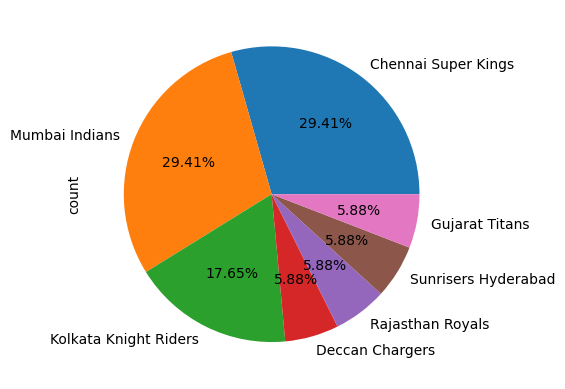

In [56]:
# List out highest ipl session winning team
df_matches[df_matches['match_type'] == 'Final']['winner'].value_counts().plot(kind="pie",autopct='%.2f%%')
plt.show()

In [57]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1095 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1095 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1095 non-null   float64       
 14  target_runs      1095 non-null   float64

In [58]:
df_matches['date'].dt.month_name()

0       April
1       April
2       April
3       April
4       April
        ...  
1090      May
1091      May
1092      May
1093      May
1094      May
Name: date, Length: 1095, dtype: object

In [59]:
final_match = df_matches[df_matches['match_type'] == 'Final']
final_match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr DY Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,Normal Method
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bengaluru,Deccan Chargers,Royal Challengers Bengaluru,field,Deccan Chargers,runs,6.0,144.0,20.0,N,Normal Method
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr DY Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,169.0,20.0,N,Normal Method
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Royal Challengers Bengaluru,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,206.0,20.0,N,Normal Method
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,"MA Chidambaram Stadium, Chepauk",Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,Normal Method
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,23.0,149.0,20.0,N,Normal Method
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,200.0,20.0,N,Normal Method
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,203.0,20.0,N,Normal Method
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,209.0,20.0,N,Normal Method
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,130.0,20.0,N,Normal Method


In [60]:
final_match['Winning year'] = final_match['date'].dt.year
print('Done')

Done


In [61]:
final_match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,Winning year
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr DY Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,164.0,20.0,N,Normal Method,2008
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bengaluru,Deccan Chargers,Royal Challengers Bengaluru,field,Deccan Chargers,runs,6.0,144.0,20.0,N,Normal Method,2009
174,419165,2009/10,Mumbai,2010-04-25,Final,SK Raina,Dr DY Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,169.0,20.0,N,Normal Method,2010
247,501271,2011,Chennai,2011-05-28,Final,M Vijay,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Royal Challengers Bengaluru,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,206.0,20.0,N,Normal Method,2011
321,548381,2012,Chennai,2012-05-27,Final,MS Bisla,"MA Chidambaram Stadium, Chepauk",Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,191.0,20.0,N,Normal Method,2012
397,598073,2013,Kolkata,2013-05-26,Final,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,23.0,149.0,20.0,N,Normal Method,2013
457,734049,2014,Bangalore,2014-06-01,Final,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,200.0,20.0,N,Normal Method,2014
516,829823,2015,Kolkata,2015-05-24,Final,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,203.0,20.0,N,Normal Method,2015
576,981019,2016,Bangalore,2016-05-29,Final,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,209.0,20.0,N,Normal Method,2016
635,1082650,2017,Hyderabad,2017-05-21,Final,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,130.0,20.0,N,Normal Method,2017


In [62]:
final_match[['Winning year','winner']].sort_values('winner')

,Winning year,winner
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
1023,2023,Chennai Super Kings
695,2018,Chennai Super Kings
875,2021,Chennai Super Kings
114,2009,Deccan Chargers
949,2022,Gujarat Titans
1094,2024,Kolkata Knight Riders
321,2012,Kolkata Knight Riders
457,2014,Kolkata Knight Riders


In [63]:
final_match['result'].value_counts()

result
runs       9
wickets    8
Name: count, dtype: int64

In [64]:
df_matches.groupby('venue')['result'].value_counts().reset_index().sort_values(by='venue')

,venue,result,count
0,Arun Jaitley Stadium,wickets,37
1,Arun Jaitley Stadium,runs,35
2,Arun Jaitley Stadium,no result,1
3,Arun Jaitley Stadium,tie,1
4,"Arun Jaitley Stadium, Delhi",runs,9
...,...,...,...
119,Wankhede Stadium,tie,1
120,"Wankhede Stadium, Mumbai",wickets,27
121,"Wankhede Stadium, Mumbai",runs,18
122,"Zayed Cricket Stadium, Abu Dhabi",wickets,5


DAY 13 DS


In [65]:
# Questions to be solve?
# Each season Winner Team
# Top 10 Match Winner team
# Toss_dicision_value_counts
# Result type value_counts
# Top 10 target Runs
# Maximum Result Margin Wins
# Top 5 Result Margin Wins
# Top 10 player_of_match
# Season Player of the match

In [66]:
# Q1: all season Winner team
final_match[['Winning year','winner']].sort_values('Winning year')

,Winning year,winner
57,2008,Rajasthan Royals
114,2009,Deccan Chargers
174,2010,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


Q2: Top 10 Match Winner team

In [67]:
df_matches['winner'].value_counts().head(10)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Delhi Capitals                 115
Punjab Kings                   112
Rajasthan Royals               112
Sunrisers Hyderabad             88
Deccan Chargers                 29
Gujarat Titans                  28
Name: count, dtype: int64

In [68]:
num_col=df_matches.describe().columns

In [69]:
cat_col=df_matches.describe(include='O').columns

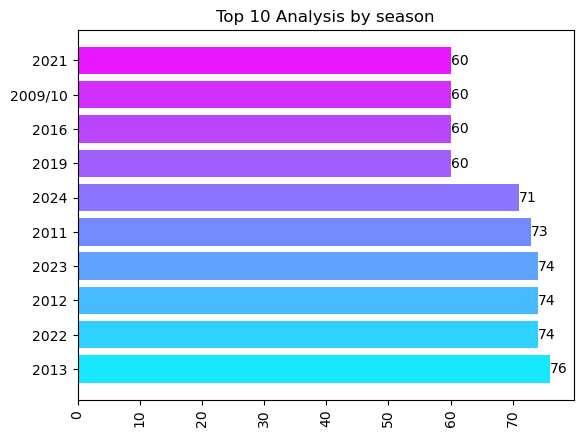

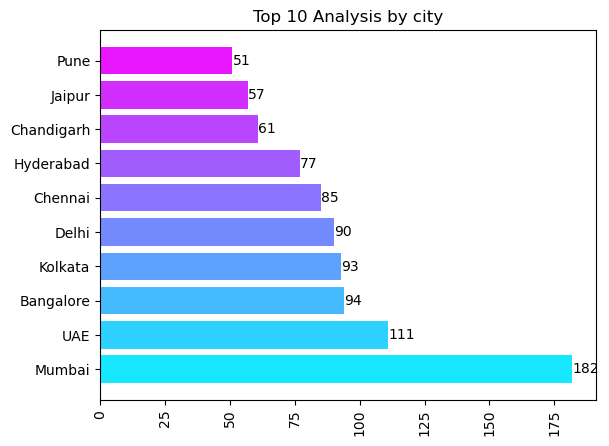

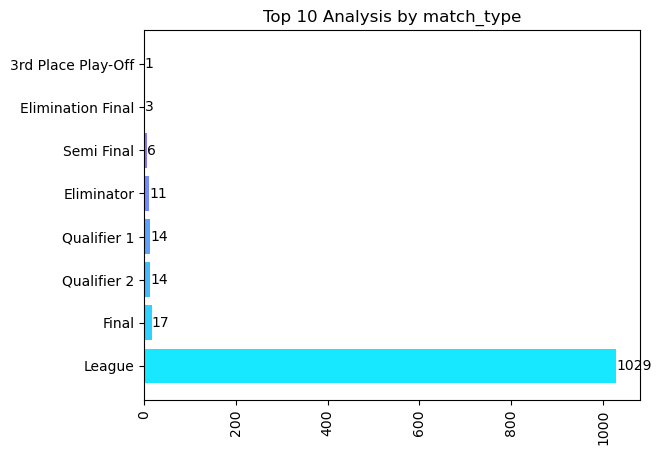

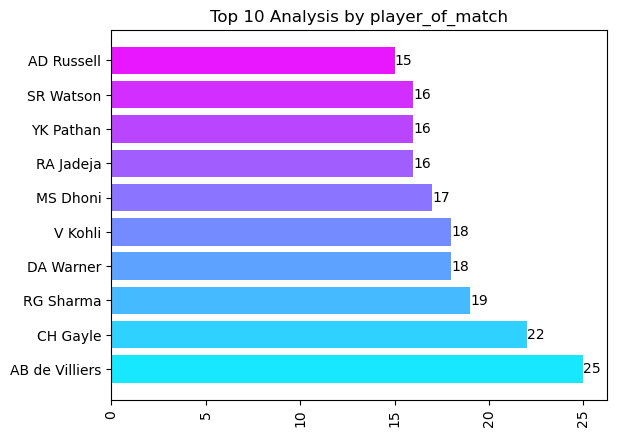

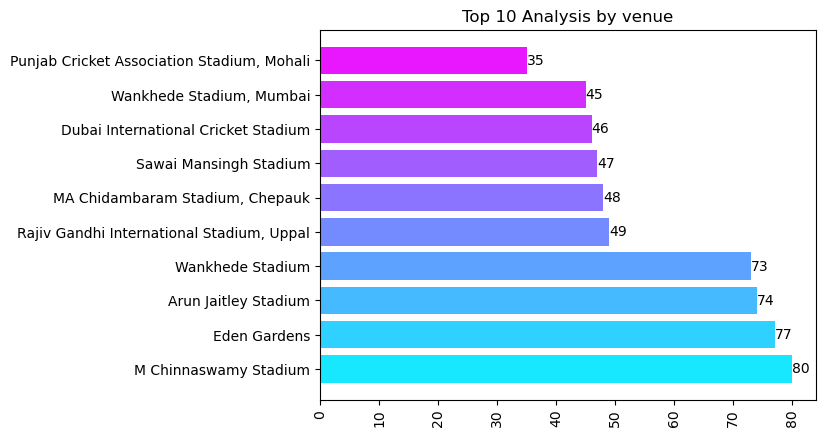

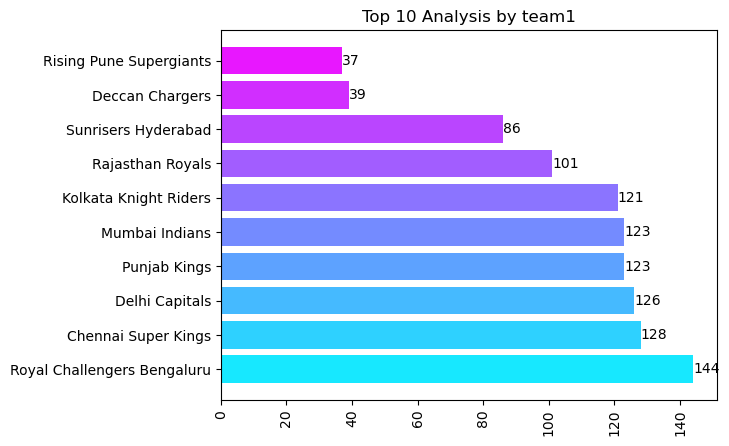

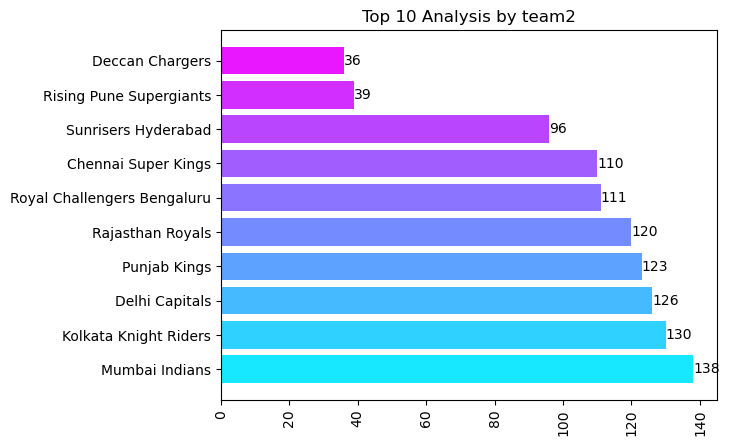

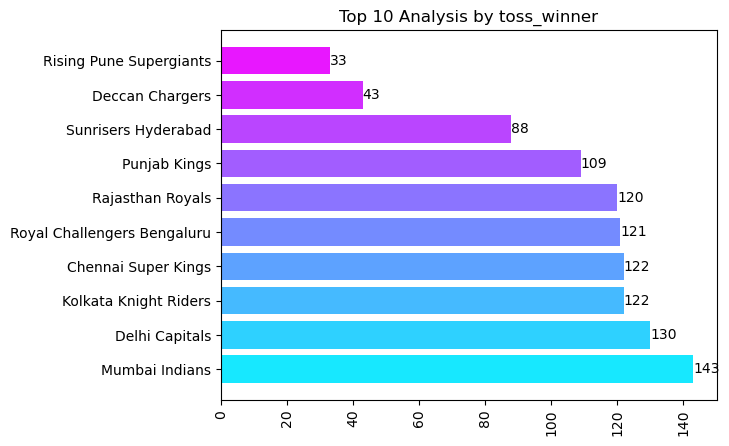

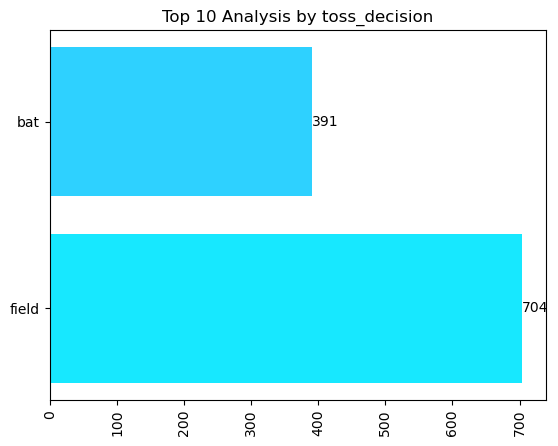

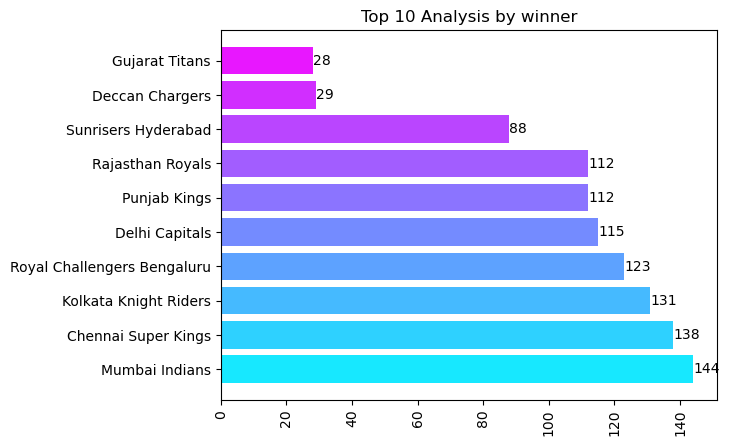

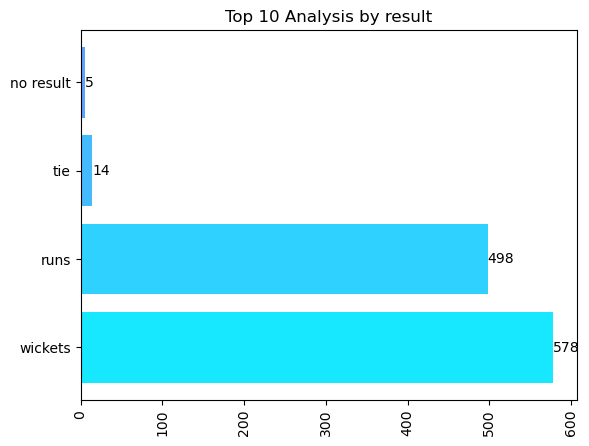

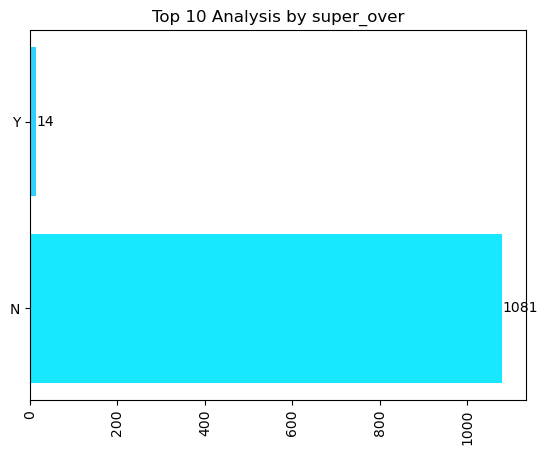

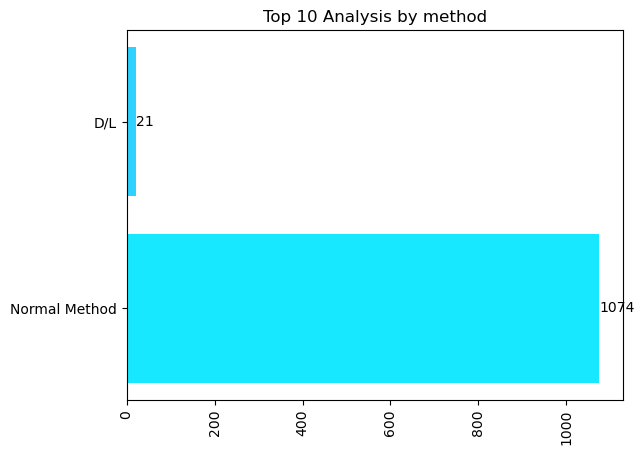

In [70]:
for i in cat_col:
  try:
    temp_df = df_matches[i].value_counts().head(10)
    x = temp_df.index
    y = temp_df.values

    plt.title(f'Top 10 Analysis by {i}')
    ax=plt.barh(x,y,color = sns.color_palette('cool',10))
    plt.bar_label(ax)
    plt.xticks(rotation = 90)
    plt.show()
  except:
    pass

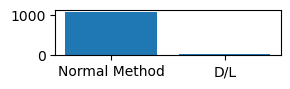

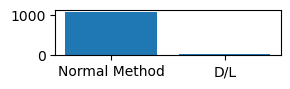

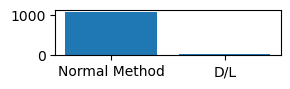

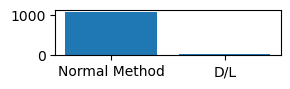

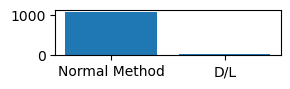

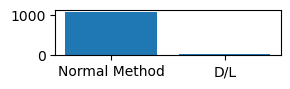

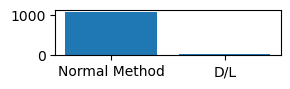

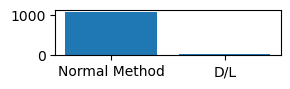

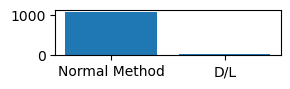

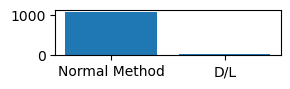

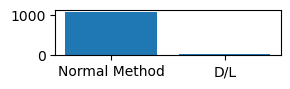

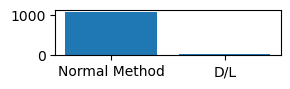

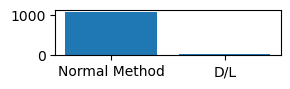

In [71]:
for i in range(len(cat_col)):
    plt.subplot(7,2,i+1)
    plt.bar(x,y)
    plt.show()

In [ ]:
plt.figure(figsize=[30,45])
import random
for j,i in enumerate(cat_col):
    temp_df = df_matches[i].value_counts().head(10)
    x = temp_df.index
    y = temp_df.values
    plt.subplot(7,2,j+1)
    plt.title(f'Top 10 Analysis by {i}')
    color=['magma','rainbow','cool','mako']
    ax=plt.barh(x,y,color = sns.color_palette(random.choice(color),10))
    plt.bar_label(ax)
    plt.xticks(rotation = 90)
plt.savefig("all categorical analysis.jpeg",dpi=3000)
plt.show()
print('done')

In [74]:
num_col=df_matches.describe().columns
num_col=list(num_col)
num_col.remove('id')
num_col.remove('date')
num_col.remove('target_overs')
num_col


['result_margin', 'target_runs']

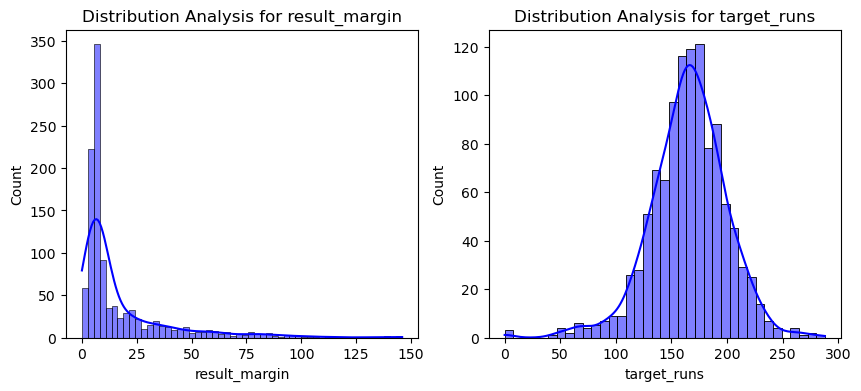

In [75]:
# Numerical Histogram
plt.figure(figsize = (10,4))
for j,i in enumerate(num_col):
  plt.subplot(1,2,j+1)
  plt.title(f'Distribution Analysis for {i}')
  sns.histplot(df_matches[i],color = 'blue',kde = True) #Kernel Density Estimator (KDE)
plt.show()

In [76]:
df_matches[df_matches['target_runs']==df_matches['target_runs'].max()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method
1053,1426268,2024,Bangalore,2024-04-15,League,TM Head,"M Chinnaswamy Stadium, Bengaluru",Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,Sunrisers Hyderabad,runs,25.0,288.0,20.0,N,Normal Method


In [77]:
# Min Target Runs which team?
temp_df = df_matches[(df_matches['winner'] != 'No winner') & (df_matches['method'] == 'Normal method')]

temp_df[temp_df['target_runs'] == temp_df['target_runs'].min()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method


In [78]:
df_matches['target_runs'].value_counts().sort_index().head(20)

target_runs
0.0     3
43.0    1
48.0    1
52.0    1
53.0    1
54.0    1
58.0    1
61.0    1
63.0    1
66.0    1
68.0    2
69.0    2
71.0    3
74.0    1
81.0    2
82.0    1
83.0    1
85.0    1
89.0    2
90.0    1
Name: count, dtype: int64

In [79]:
df_matches[df_matches['date'].dt.year == 2017].sort_values(by = 'winner')[['winner','result','result_margin']]

,winner,result,result_margin
617,Delhi Capitals,wickets,7.0
615,Delhi Capitals,wickets,6.0
591,Delhi Capitals,runs,51.0
627,Delhi Capitals,runs,7.0
625,Delhi Capitals,wickets,2.0
585,Delhi Capitals,runs,97.0
589,Gujarat Lions,wickets,7.0
599,Gujarat Lions,wickets,4.0
606,Gujarat Lions,wickets,7.0
622,Gujarat Lions,wickets,6.0


In [80]:
df_matches.iloc[603,:]

id                                     1082617
season                                    2017
city                                   Kolkata
date                       2017-04-23 00:00:00
match_type                              League
player_of_match                NM Coulter-Nile
venue                             Eden Gardens
team1                    Kolkata Knight Riders
team2              Royal Challengers Bengaluru
toss_winner        Royal Challengers Bengaluru
toss_decision                            field
winner                   Kolkata Knight Riders
result                                    runs
result_margin                             82.0
target_runs                              132.0
target_overs                              20.0
super_over                                   N
method                           Normal Method
Name: 603, dtype: object

In [81]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method'],
      dtype='object')

In [86]:
#pivot table
df_matches['year']=df_matches['date'].dt.year
df_matches.columns
plt.figure(figsize=(20,20))
sns.heatmap(all_time_year_df,annot=True)
plt.show()


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'year'],
      dtype='object')

In [112]:
all_team_year_df=df_matches.pivot_table(index="year",columns="team1",values="target_runs")
all_team_year_df = all_team_year_df.round(0)

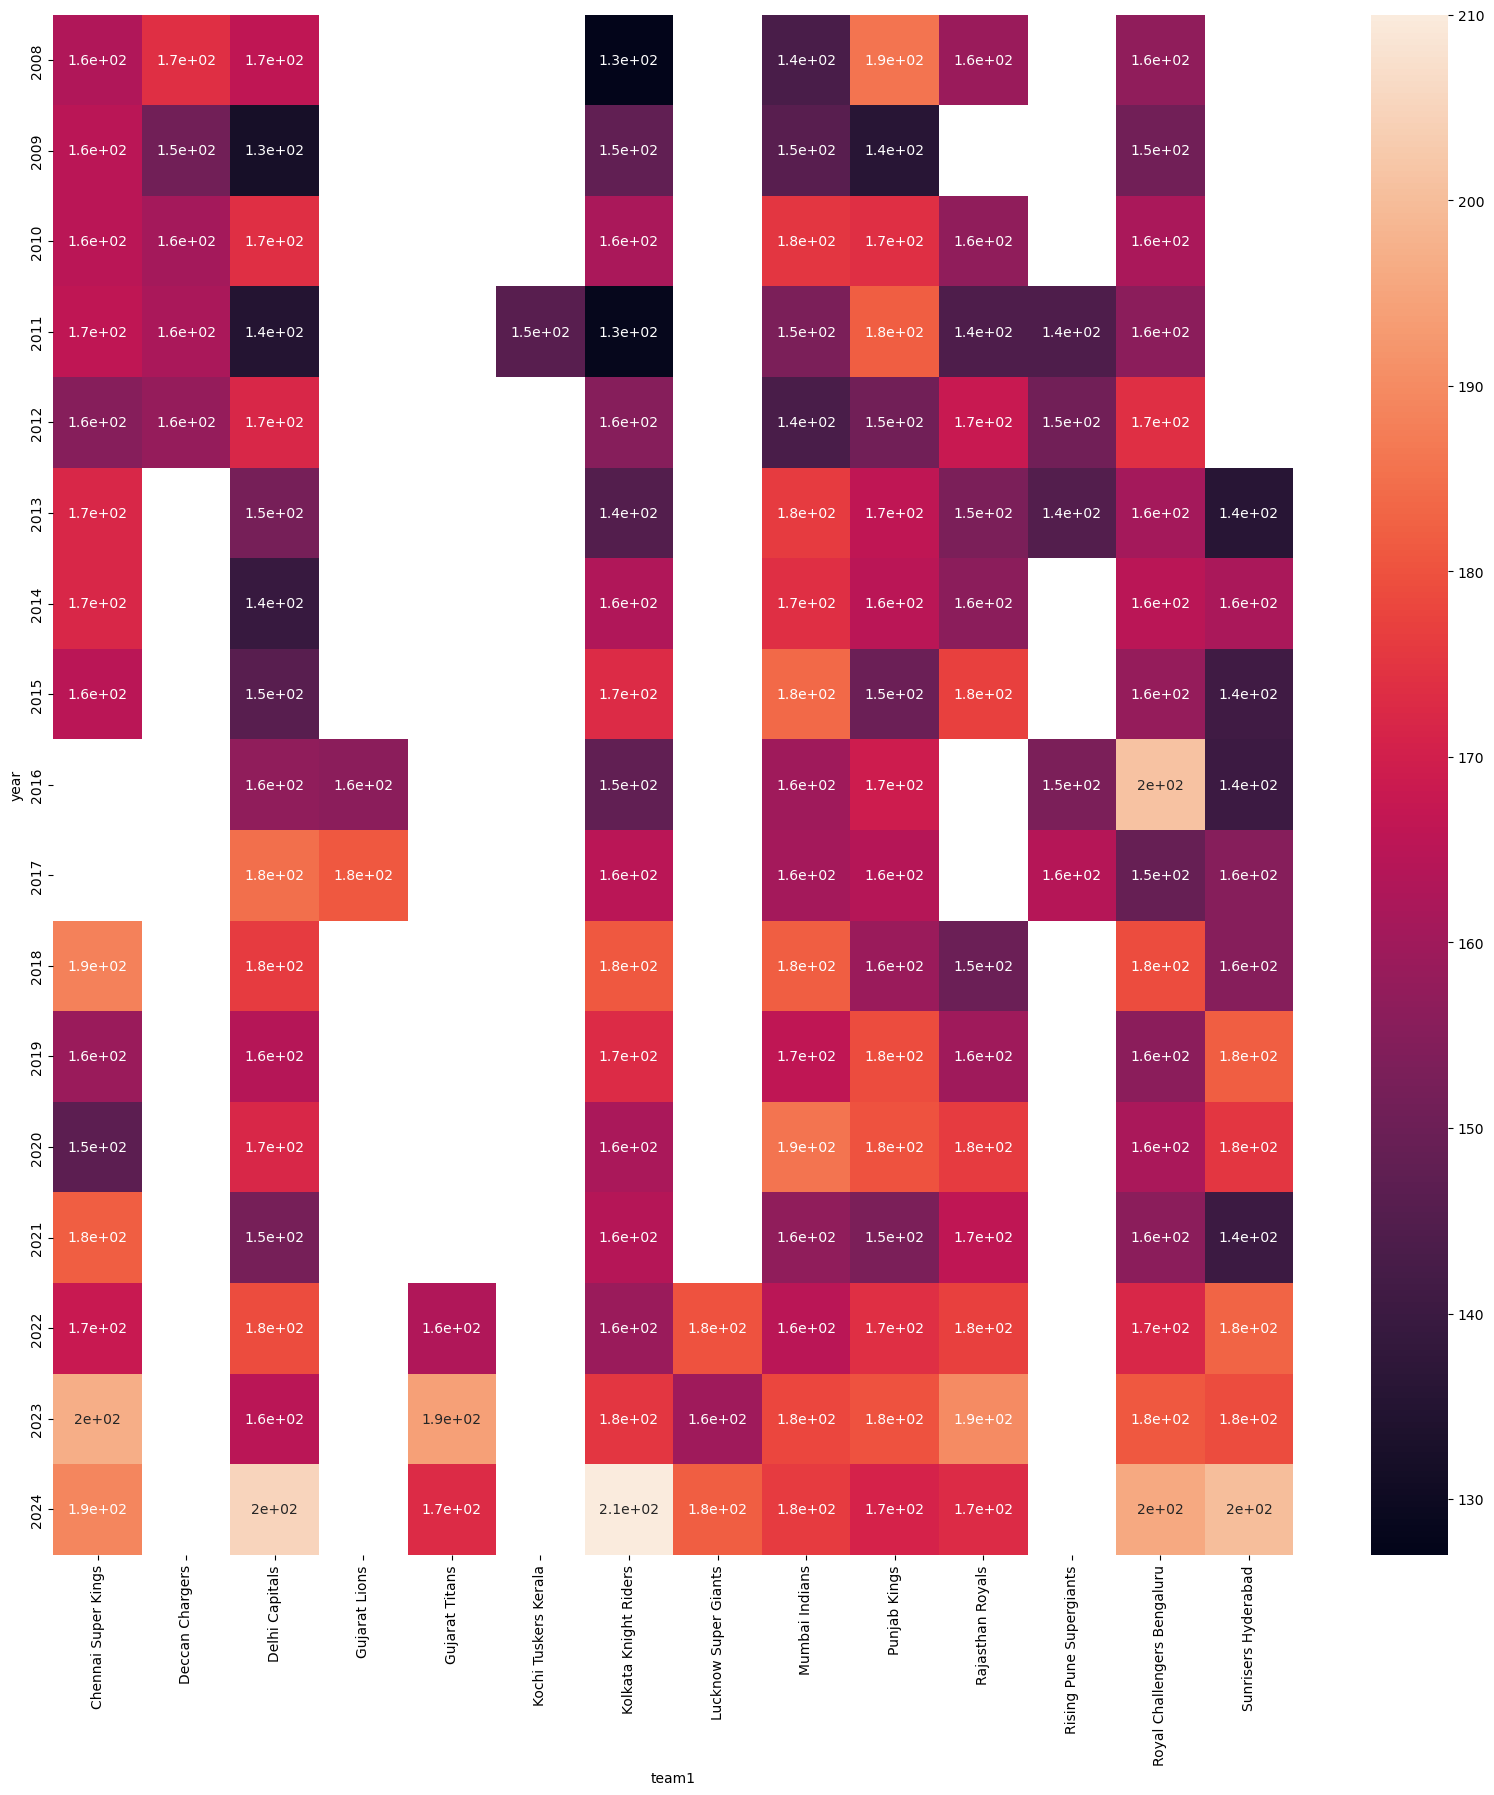

In [113]:
plt.figure(figsize=(20,20))
sns.heatmap(all_team_year_df,annot=True)
plt.show()


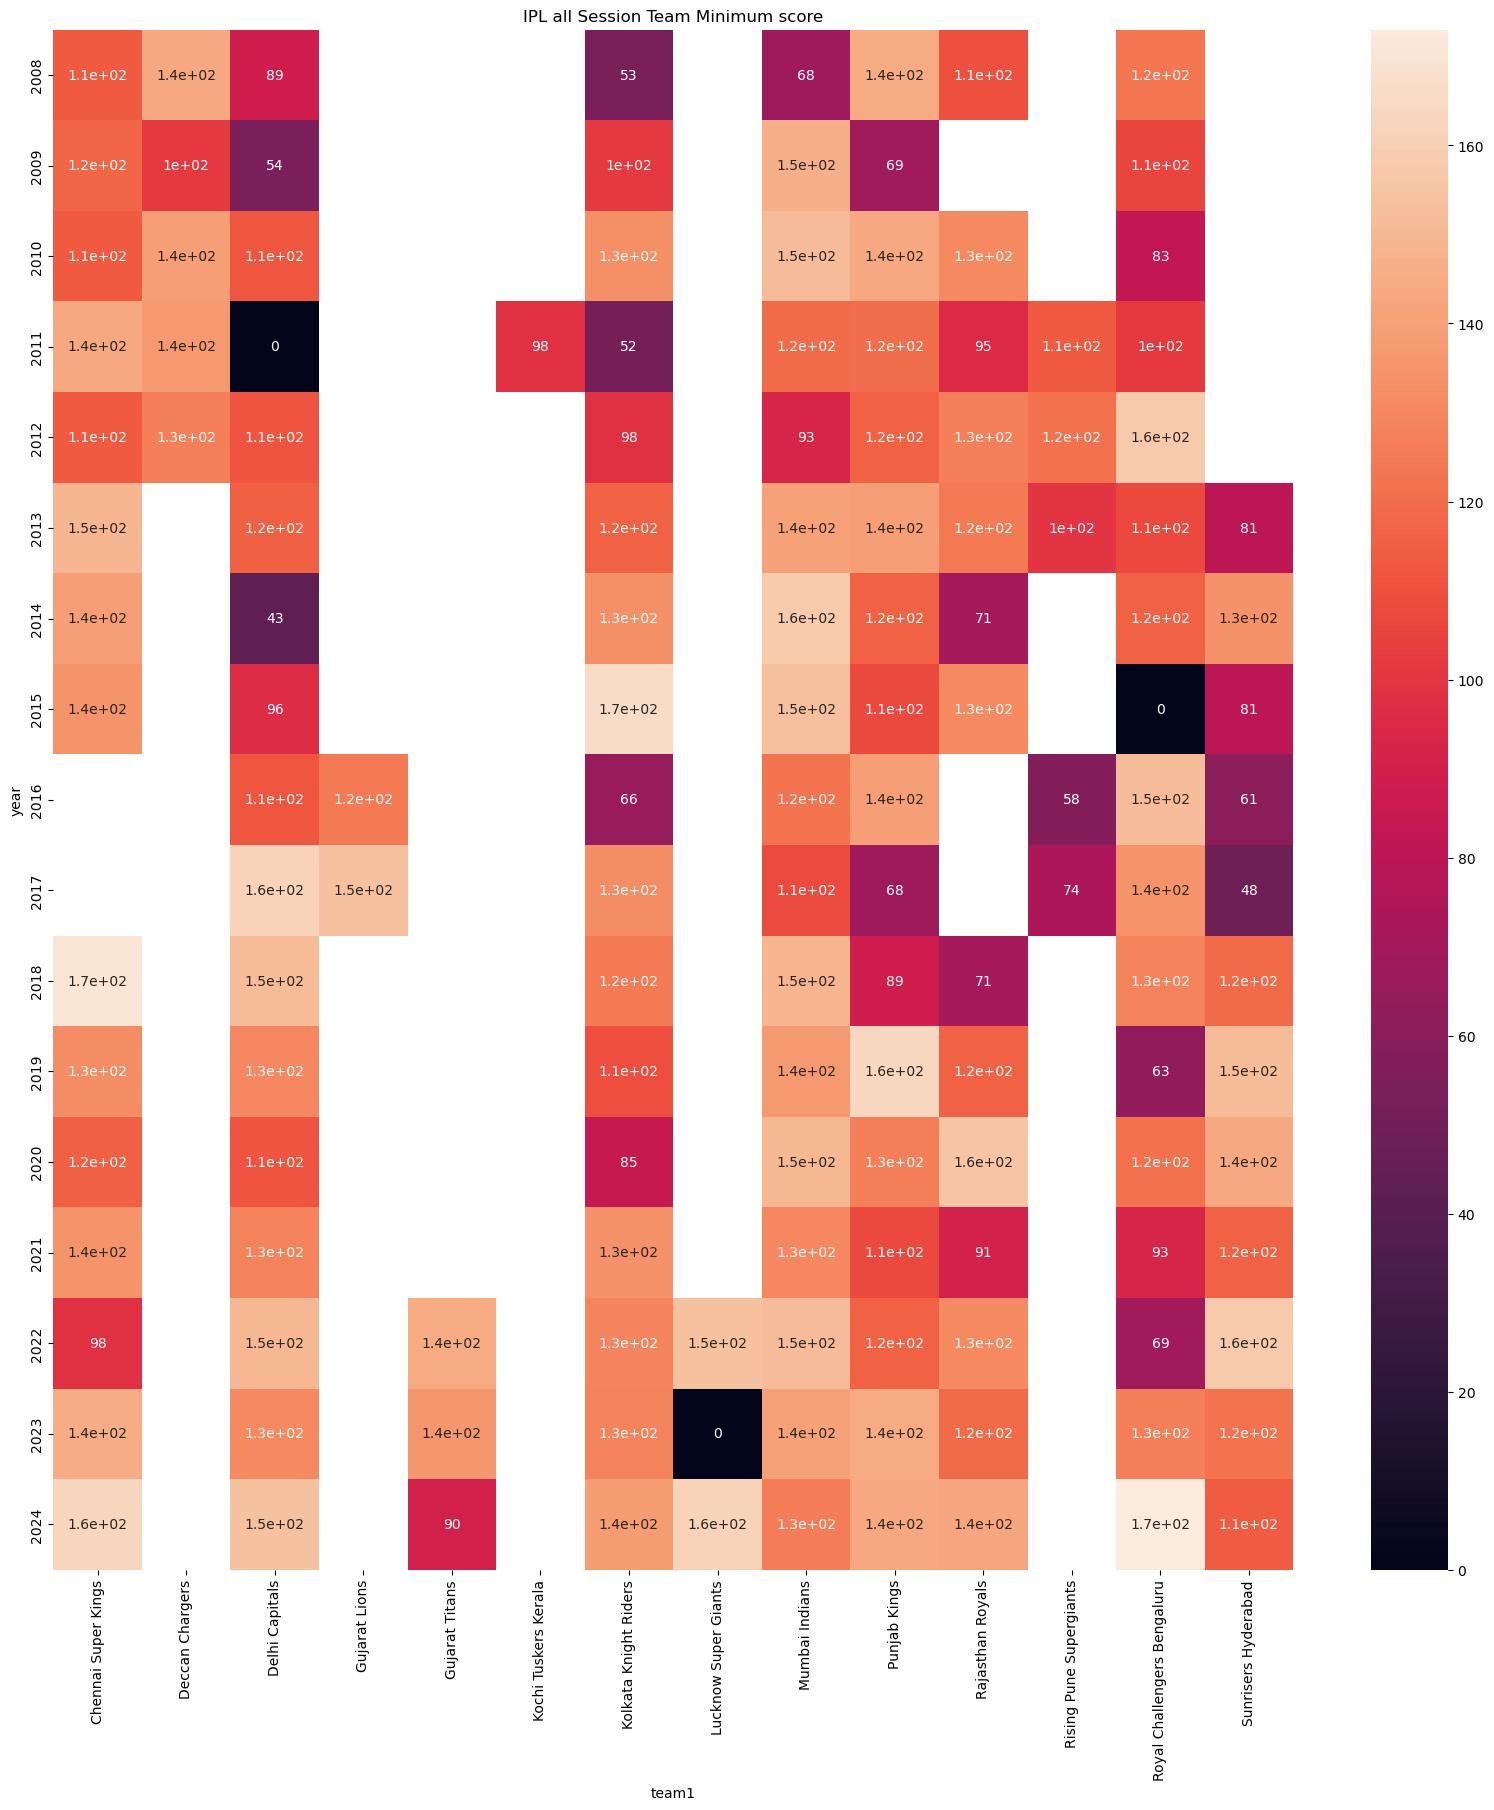

In [111]:
all_team_year_df=df_matches.pivot_table(index="year",columns="team1",values="target_runs",aggfunc='min')
all_team_year_df = all_team_year_df.round(0)
plt.figure(figsize=(20,20))
sns.heatmap(all_team_year_df,annot=True)
plt.title('IPL all Session Team Minimum score')
plt.show()


In [115]:
df_matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,year
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Normal Method,2008
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.00,241.00,20.00,N,Normal Method,2008
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Arun Jaitley Stadium,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.00,130.00,20.00,N,Normal Method,2008
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.00,166.00,20.00,N,Normal Method,2008
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.00,111.00,20.00,N,Normal Method,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.00,215.00,20.00,N,Normal Method,2024
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.00,160.00,20.00,N,Normal Method,2024
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.00,173.00,20.00,N,Normal Method,2024
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.00,176.00,20.00,N,Normal Method,2024


In [114]:
#LOC:lOCATION NAME
#ILOC:Index Pass
df_matches.iloc[50:55,[7,8,12]]


,team1,team2,result
50,Kolkata Knight Riders,Punjab Kings,wickets
51,Rajasthan Royals,Mumbai Indians,wickets
52,Deccan Chargers,Chennai Super Kings,wickets
53,Royal Challengers Bengaluru,Mumbai Indians,wickets
54,Punjab Kings,Rajasthan Royals,runs


In [116]:
rows = df_matches[df_matches['year']>=2016].index
df_matches.iloc[rows ,-3:]

,super_over,method,year
517,N,Normal Method,2016
518,N,Normal Method,2016
519,N,Normal Method,2016
520,N,Normal Method,2016
521,N,Normal Method,2016
...,...,...,...
1090,N,Normal Method,2024
1091,N,Normal Method,2024
1092,N,Normal Method,2024
1093,N,Normal Method,2024


In [120]:
df_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [121]:
df_deliveries.isna().sum().sort_values(ascending=False)

fielder             251566
dismissal_kind      247970
player_dismissed    247970
extras_type         246795
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
non_striker              0
bowler                   0
batter                   0
ball                     0
total_runs               0
extra_runs               0
batsman_runs             0
is_wicket                0
dtype: int64

In [122]:
df_deliveries.loc[:,['fielder','dismissal_kind','player_dismissed','extras_type']]

,fielder,dismissal_kind,player_dismissed,extras_type
0,NaN,NaN,NaN,legbyes
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,wides
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
260915,NaN,NaN,NaN,NaN
260916,NaN,NaN,NaN,NaN
260917,NaN,NaN,NaN,NaN
260918,NaN,NaN,NaN,NaN


In [123]:
normal_cols = ['fielder','dismissal_kind','player_dismissed','extras_type']


In [124]:
for i in normal_cols:
  print(f'Analysis for {i}\n\n')
  display(df_deliveries[i].value_counts().head(10))

Analysis for fielder




fielder
MS Dhoni          220
KD Karthik        199
AB de Villiers    141
RV Uthappa        133
V Kohli           131
WP Saha           131
SK Raina          119
RA Jadeja         116
SV Samson         115
RG Sharma         111
Name: count, dtype: int64

Analysis for dismissal_kind




dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

Analysis for player_dismissed




player_dismissed
RG Sharma     223
V Kohli       207
S Dhawan      193
KD Karthik    184
RV Uthappa    180
SK Raina      171
DA Warner     164
AT Rayudu     155
AM Rahane     154
SV Samson     144
Name: count, dtype: int64

Analysis for extras_type




extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

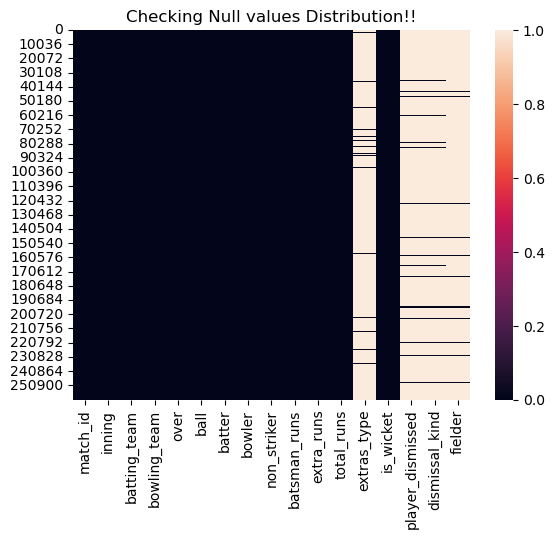

In [125]:
plt.title('Checking Null values Distribution!!')
sns.heatmap(df_deliveries.isna())
plt.show()

In [130]:
batsman = 'DA Miller'


def get_player_perfromance_stats(batsman):

  player_df =df_deliveries[df_deliveries['batter'] == batsman]

  x = player_df['batsman_runs'].value_counts().sort_index().index
  y = player_df['batsman_runs'].value_counts().sort_index().values
  plt.figure(figsize = (4,2))
  plt.title(f'Analysis for {batsman}')
  ax = plt.bar(x,y,color = sns.color_palette('magma',7))
  plt.bar_label(ax)
  plt.show()

  total_runs = player_df['batsman_runs'].sum()

  print(f'{batsman} Total Runs in IPL History: {total_runs}')


  print(f'Batsman {batsman} Top 10 Performance Against Bowlers')
  perfomance_df = player_df.groupby('bowler')['batsman_runs'].agg(['sum','mean']).reset_index().sort_values(by = 'sum',ascending=False).head(10)


  display(perfomance_df)

In [131]:
all_batsman = df_deliveries['batter'].unique()
print('done')

done


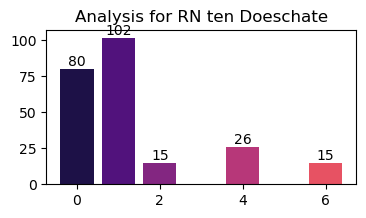

RN ten Doeschate Total Runs in IPL History: 326
Batsman RN ten Doeschate Top 10 Performance Against Bowlers


,bowler,sum,mean
6,AG Murtaza,27,1.80
5,AD Mathews,24,2.00
9,B Kumar,24,2.18
26,KA Pollard,24,1.85
13,DJ Bravo,20,1.67
44,SL Malinga,17,1.21
17,Harbhajan Singh,15,1.00
23,JEC Franklin,14,2.33
1,A Nehra,14,2.00
28,Karanveer Singh,13,3.25


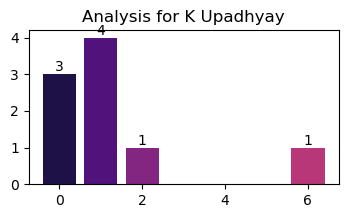

K Upadhyay Total Runs in IPL History: 12
Batsman K Upadhyay Top 10 Performance Against Bowlers


,bowler,sum,mean
1,R Vinay Kumar,7,1.75
2,Z Khan,4,1.00
0,L Balaji,1,1.00


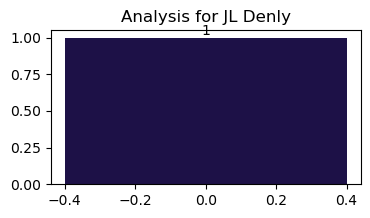

JL Denly Total Runs in IPL History: 0
Batsman JL Denly Top 10 Performance Against Bowlers


,bowler,sum,mean
0,I Sharma,0,0.00


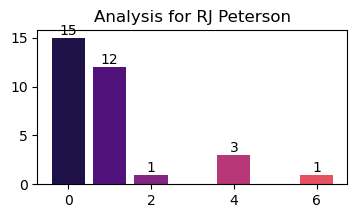

RJ Peterson Total Runs in IPL History: 32
Batsman RJ Peterson Top 10 Performance Against Bowlers


,bowler,sum,mean
8,PP Chawla,15,3.75
5,M Kartik,5,1.67
7,MJ Clarke,4,1.00
10,WD Parnell,3,1.00
3,Azhar Mahmood,1,0.33
0,A Ashish Reddy,1,0.25
2,A Nehra,1,0.25
9,S Nadeem,1,1.00
6,M Morkel,1,1.00
1,A Mishra,0,0.00


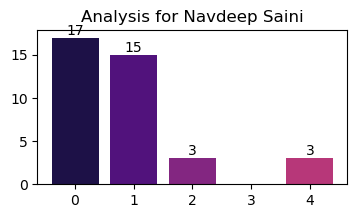

Navdeep Saini Total Runs in IPL History: 33
Batsman Navdeep Saini Top 10 Performance Against Bowlers


,bowler,sum,mean
2,HV Patel,8,1.33
10,T Natarajan,6,1.20
6,M Ashwin,4,2.00
8,RA Jadeja,4,0.80
5,K Rabada,3,0.75
4,JO Holder,3,1.00
11,TS Mills,2,1.00
0,A Nortje,1,0.50
9,Ravi Bishnoi,1,0.33
1,GJ Maxwell,1,0.50


In [132]:
import random
for i in random.choices(all_batsman,k = 5):
  get_player_perfromance_stats(i)
